In [1]:
from forecasting_models.model_selector import select_forecasting_model
# from error_metrics.error import error_selector
import pandas as pd

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
df_alb = pd.read_csv("data/peajes_alberdi_training_preproc.csv")
df_alb['date'] = pd.to_datetime(df_alb['fecha'], format = '%Y-%m-%d')

In [11]:
df_alb_train = df_alb.copy()[df_alb['date'] < '2019-07-01']
df_alb_test = df_alb.copy()[df_alb['date'] >= '2019-07-01']

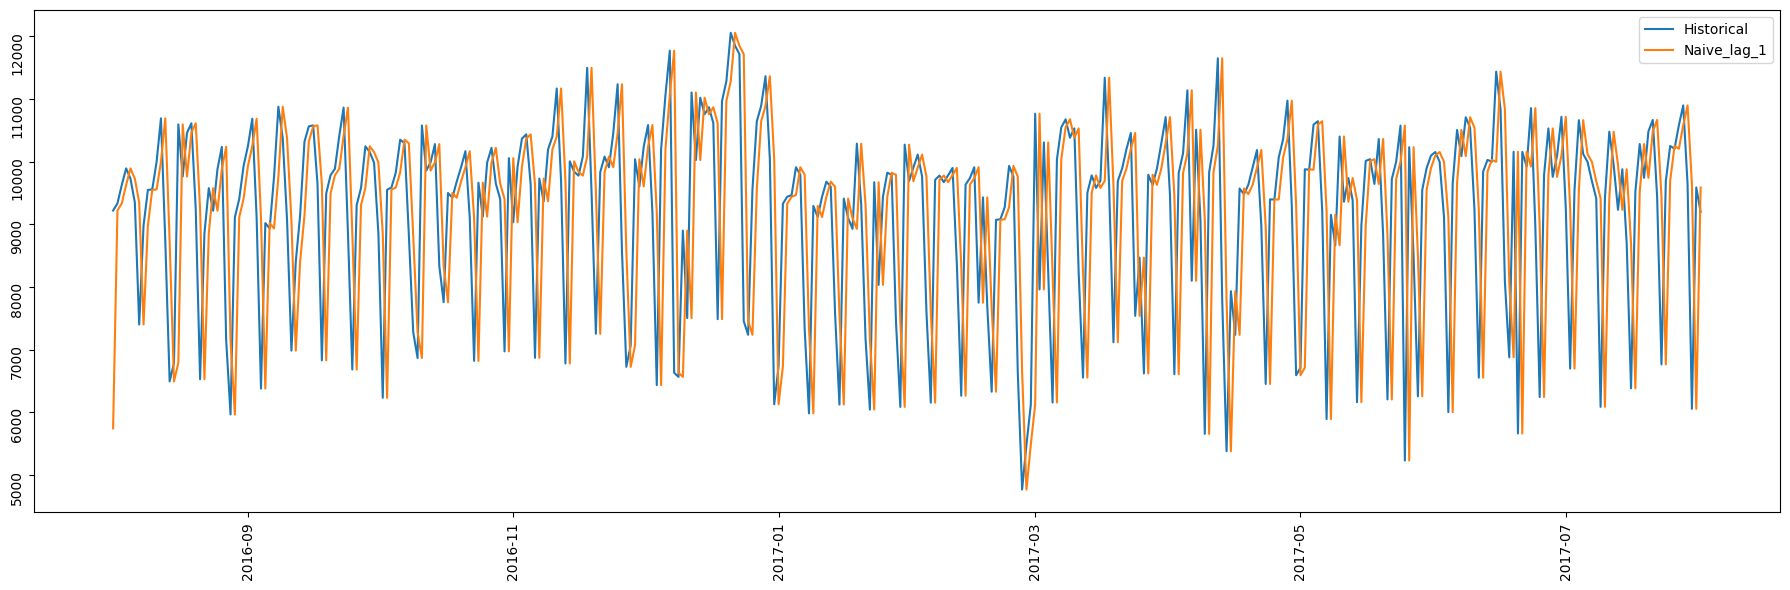

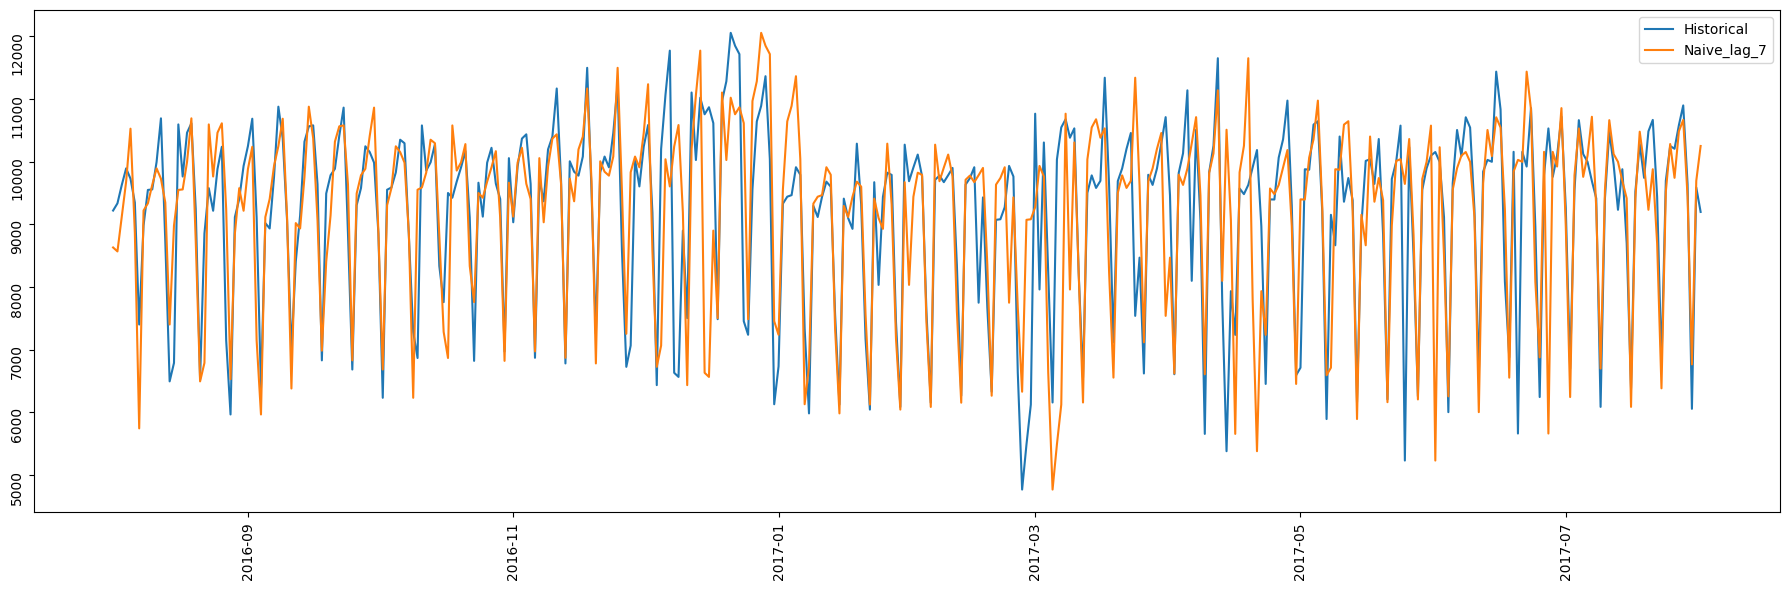

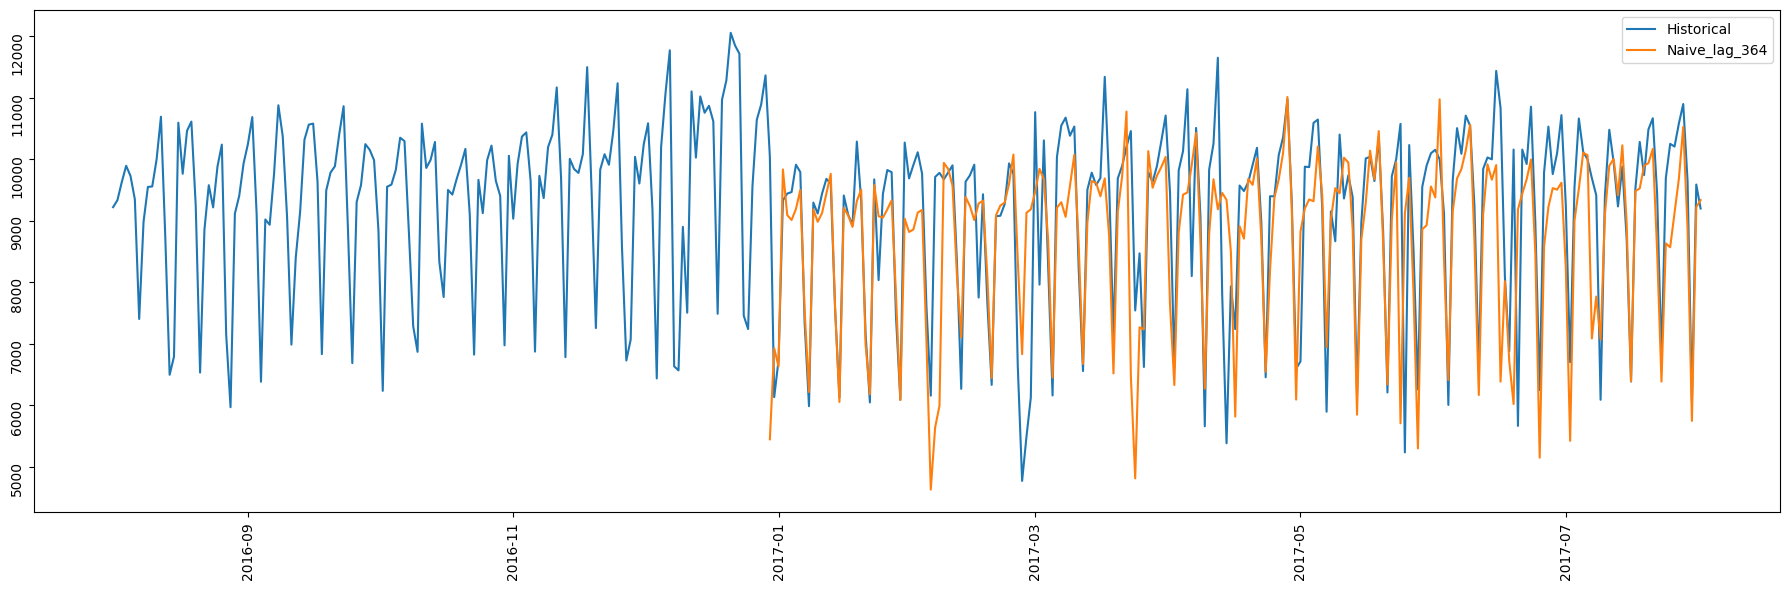

In [12]:
model_class = select_forecasting_model("Naive")
for periods in [1, 7, 364]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', n_periods=periods)
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2016-08-01', end_date='2017-08-01')

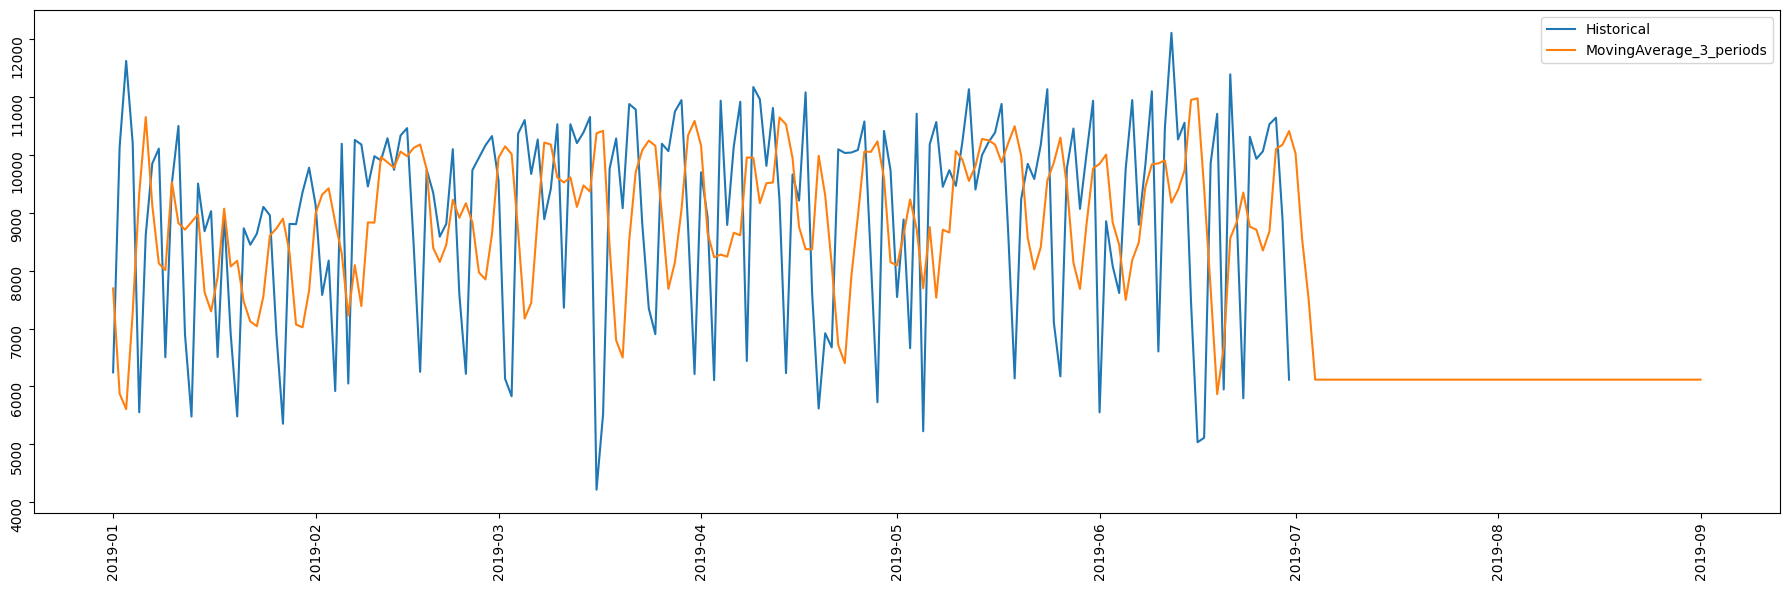

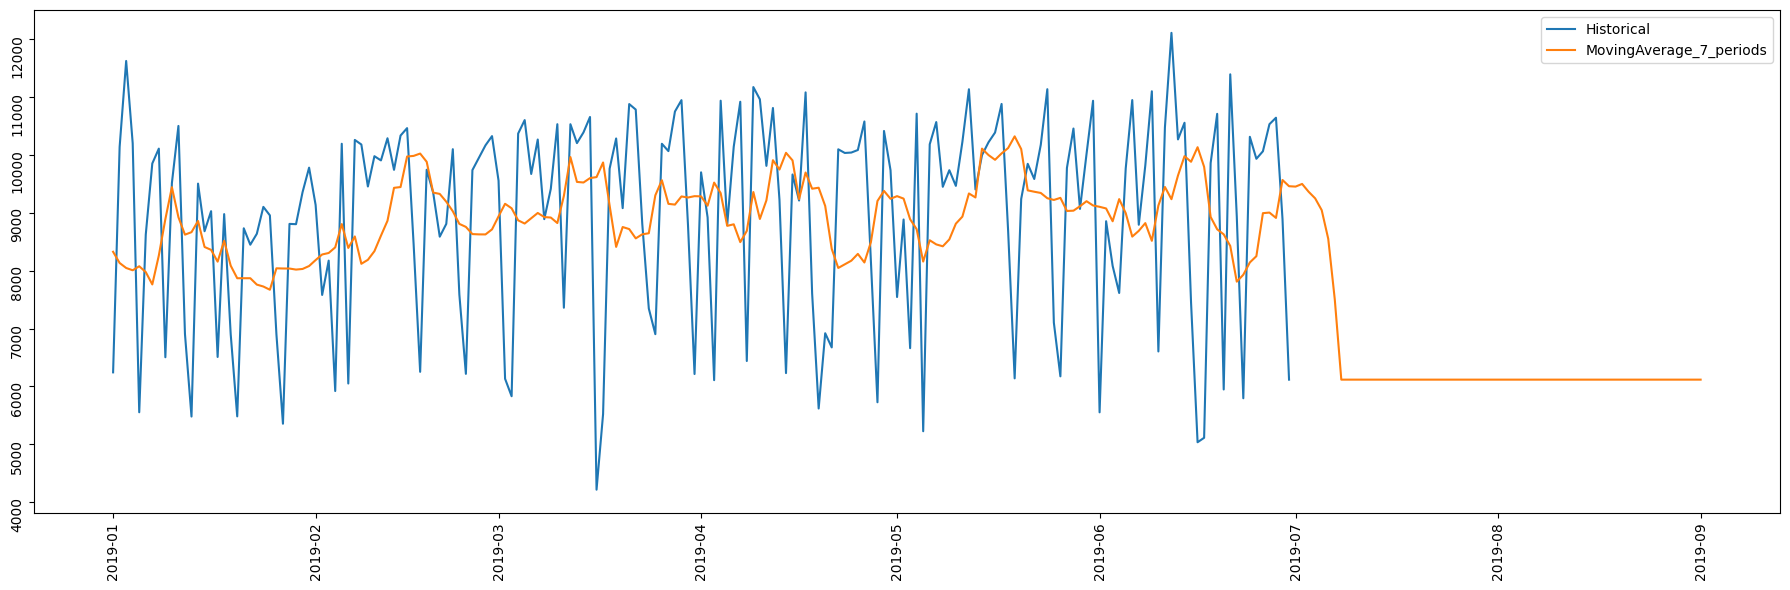

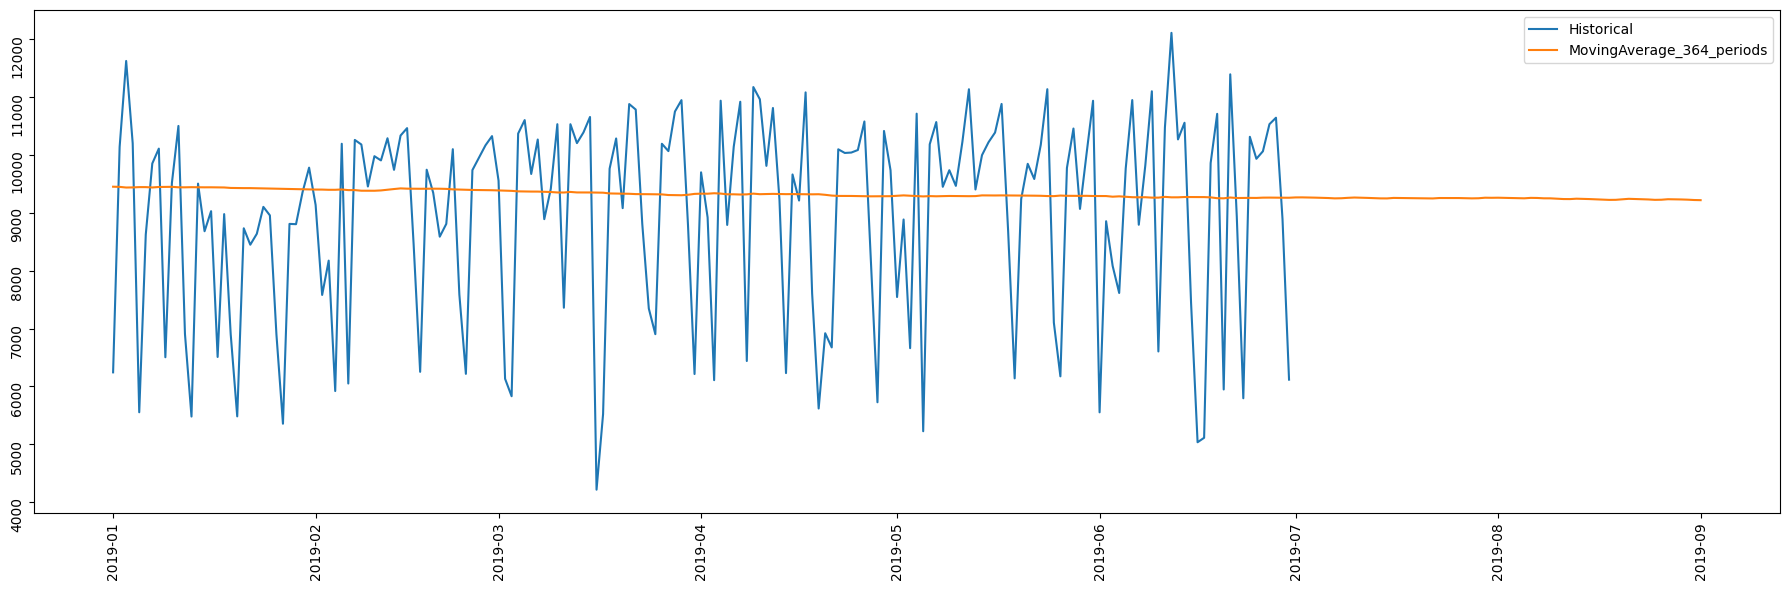

In [13]:
model_class = select_forecasting_model("Rolling Mean")
for period in [3, 7, 364]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', n_periods=period)
    model_instance.fit_train()
    model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

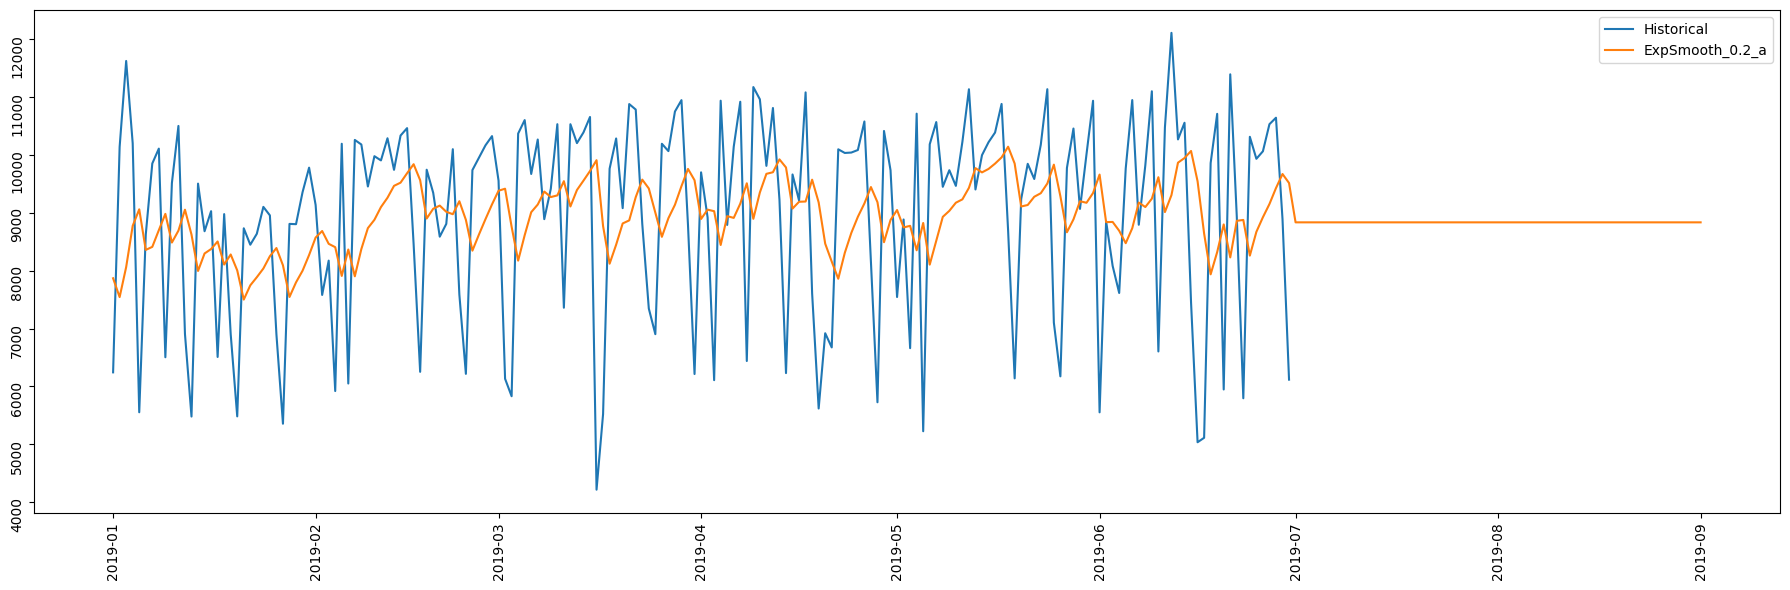

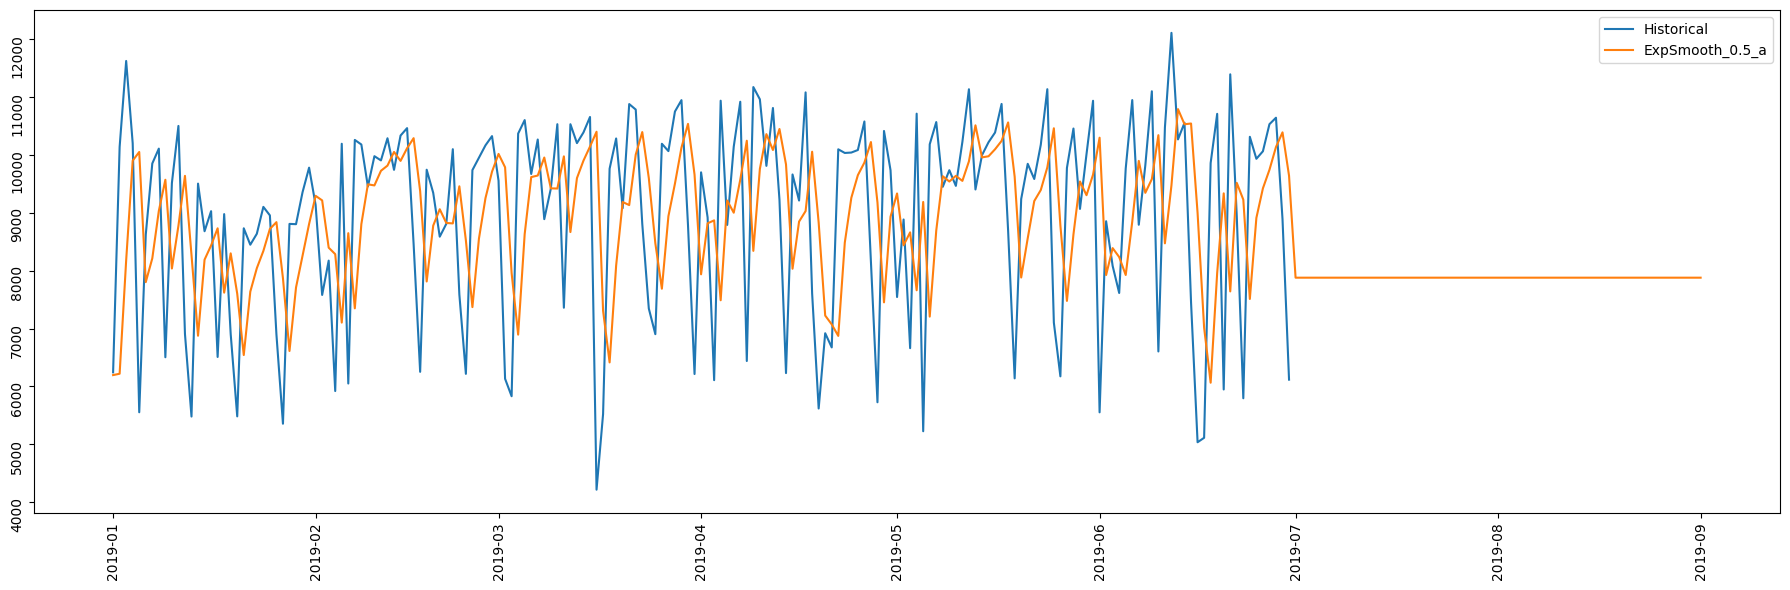

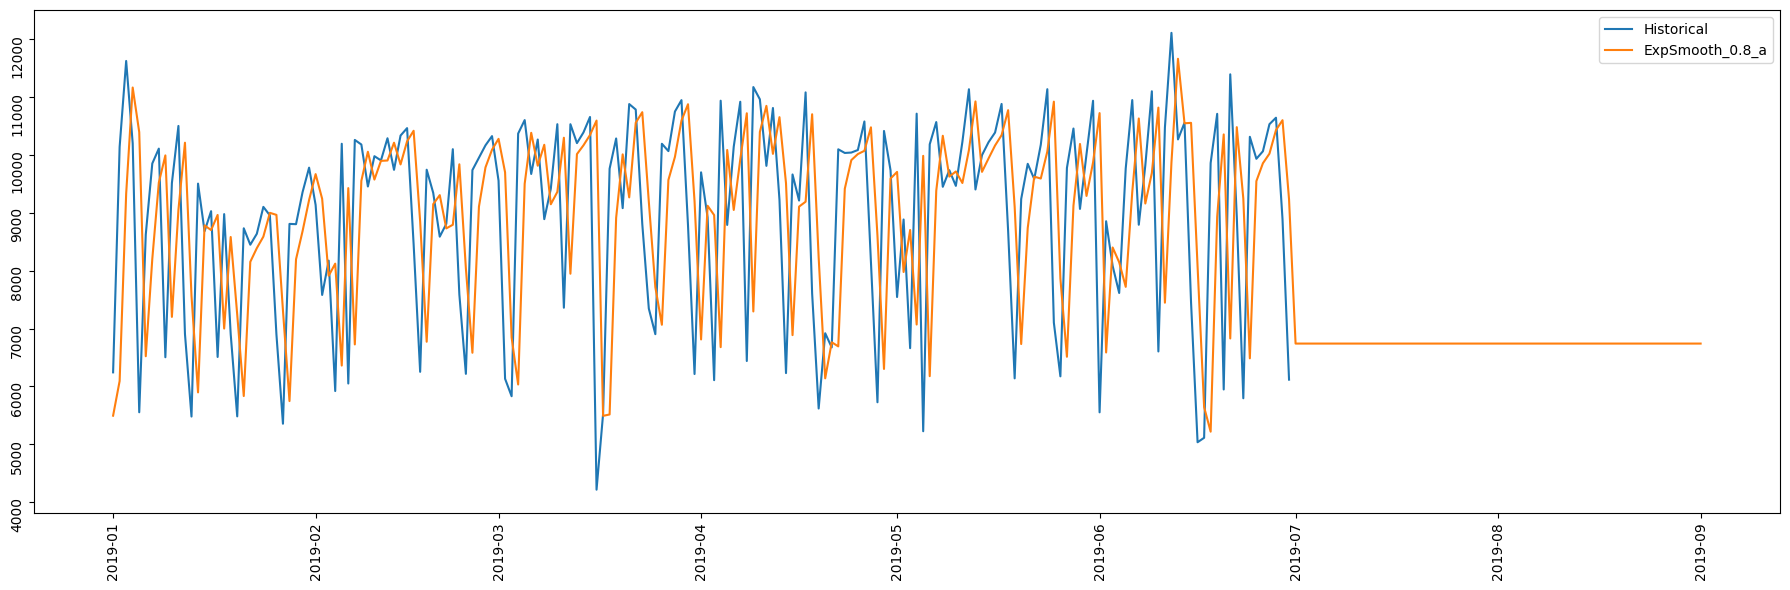

In [14]:
model_class = select_forecasting_model("exponential smoothing")

for alpha in [0.2, 0.5, 0.8]:
    model_instance = model_class(df=df_alb_train.copy(), x_col_name='date', y_col_name='cantidad_pasos', smoothing_level=alpha)
    model_instance.fit_train()
    y_test = model_instance.predict(df_alb_test.copy()[['date']])
    model_instance.plot_results(start_date='2019-01-01', end_date='2019-09-01')

In [15]:
# # error_class = error_selector("MAPE")
# error_class = ErrorMAE
# y_pred_filter_nan = df_alb[model_instance.model_name].dropna()
# y_true = df_alb[df_alb.index.isin(y_pred_filter_nan.index)]['cantidad_pasos'].dropna()
# y_pred_filter_nan = y_pred_filter_nan[y_pred_filter_nan.index.isin(y_true.index)]
# 
# 
# 
# error_instance = error_class(y_true=y_true, y_pred=y_pred_filter_nan)
# print(error_instance.calculate_error())